In [21]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wng

%matplotlib inline

wng.filterwarnings('ignore')

In [22]:
#Read CSV or Data
df=pd.read_csv('delivery_time.csv')
df.head()
#delivery time is target column or dependent column
#Sorting time is dependent column

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [23]:
#Data Description
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

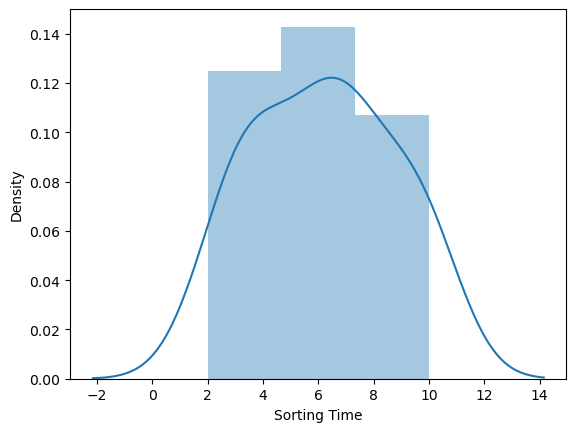

In [24]:
sns.distplot(df['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

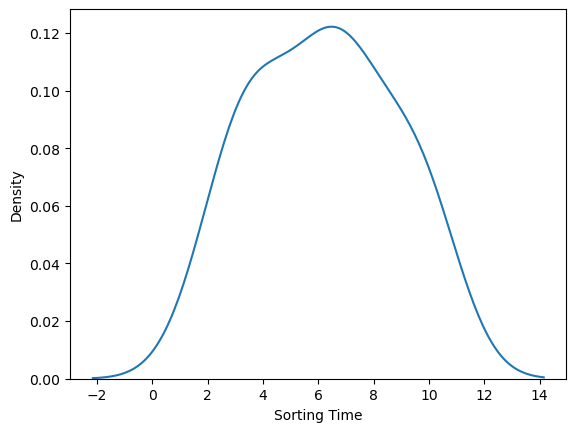

In [25]:
sns.kdeplot(df['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

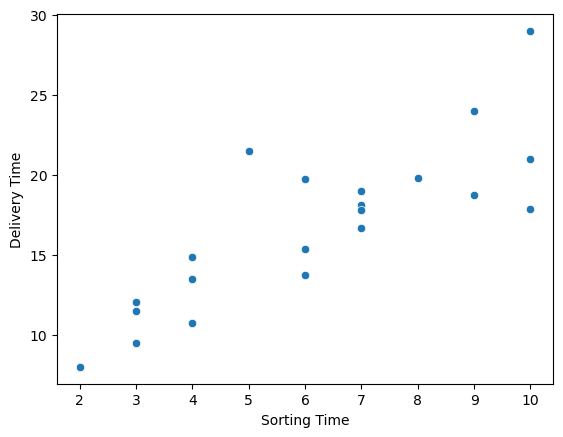

In [26]:
sns.scatterplot(df['Sorting Time'],df['Delivery Time'])

In [27]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

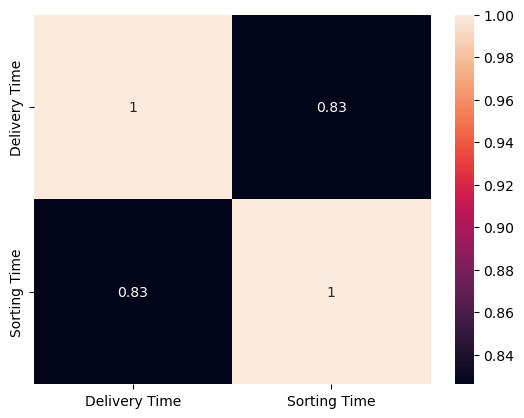

In [28]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Sort_Time', ylabel='Del_Time'>

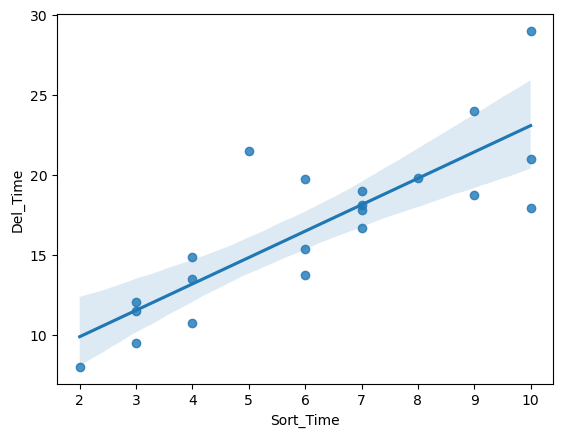

In [51]:
sns.regplot(df['Sort_Time'],df['Del_Time'])

In [30]:
import statsmodels.formula.api as smf #can use sklearn but smf give more functionality

In [46]:
df=df.rename({'Delivery Time':'Del_Time','Sorting Time':'Sort_Time'},axis=1)
model=smf.ols('Del_Time~Sort_Time',data=df).fit() #.fit() calculating slope value (m) and intecept value (c)


In [47]:
model.params #y=mx+c m=slope, c=intercept value, x= data point for prediction

Intercept    6.582734
Sort_Time    1.649020
dtype: float64

In [63]:
print(f't Value:\n{model.tvalues} \n\np Value:\n{model.pvalues}')

t Value:
Intercept    3.823349
Sort_Time    6.387447
dtype: float64 

p Value:
Intercept    0.001147
Sort_Time    0.000004
dtype: float64


In [65]:
print(f'r squared:\n{model.rsquared} \n\nadj. r square:\n{model.rsquared_adj}')

r squared:
0.6822714748417231 

adj. r square:
0.6655489208860244


In [78]:
#New Data Prediction
new_Dt=pd.Series([4,9]) #predict delivery time for new sorting time

In [79]:
df1=pd.DataFrame(new_Dt,columns=['Sort_Time'])

In [81]:
df1

,Sort_Time
0,4
1,9


In [82]:
model.predict(df1)

0    13.178814
1    21.423913
dtype: float64